In [12]:
import numpy as np
from make_ddf_survey import generate_ddf_scheduled_obs, optimize_ddf_times
from rubin_sim.utils import calcSeason, ddf_locations
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
names = ['XMM_LSS', 'COSMOS'] + ['ELAISS1', 'ECDFS', 'EDFS_a']

In [3]:
data_file='ddf_grid.npz'
ddf_data = np.load(data_file)
ddf_grid = ddf_data['ddf_grid'].copy()

In [4]:
ddf_grid

array([(60218.        , -0.29811383, 1.80175978, 21.90519431, 24.09010789,  -15.87772901, nan, nan, -12.88972328, nan, nan, -1.32240592, nan, nan, 10.11455854, nan, nan, 25.73116666, nan, nan),
       (60218.01041667, -0.35266804, 1.68622247, 22.01955751, 24.20762808, -148.93641028, nan, nan, -31.85669643, nan, nan, -1.27536809, nan, nan,  7.61004813, nan, nan, 14.10008807, nan, nan),
       (60218.02083333, -0.40660643, 1.58724299, 20.50823798, 23.57185679,   20.09596041, nan, nan,  62.66969967, nan, nan, -1.2365772 , nan, nan,  6.05980576, nan, nan,  9.58994955, nan, nan),
       ...,
       (63870.46874915,  0.18514584, 0.        ,         nan,         nan,    0.        , nan, nan,   0.        ,  0., inf,  0.        ,  0., inf,  0.        ,  0., inf,  0.        ,  0., inf),
       (63870.47916582,  0.24161748, 0.        ,         nan,         nan,    0.        , nan, nan,   0.        ,  0., inf,  0.        ,  0., inf,  0.        ,  0., inf,  0.        ,  0., inf),
       (63870.4895

In [6]:
ddfs = ddf_locations()

In [7]:
ddfs

{'ELAISS1': (9.45, -44.0),
 'XMM_LSS': (35.708333, -4.75),
 'ECDFS': (53.125, -28.1),
 'COSMOS': (150.1, 2.1819444444444445),
 'EDFS_a': (58.9, -49.315),
 'EDFS_b': (63.6, -47.6)}

In [14]:
season = calcSeason(ddfs['ELAISS1'][0], ddf_grid['mjd'])

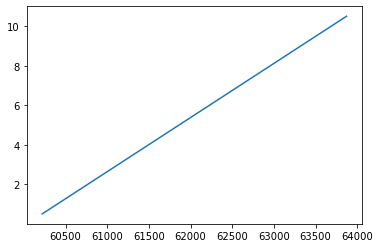

In [15]:
plt.plot(ddf_grid['mjd'], season)

In [18]:

for name in names:
    season = calcSeason(ddfs[name][0], ddf_grid['mjd'])
    diffs = np.diff(np.floor(season))
    changes = ddf_grid['mjd'][np.where(diffs > 0)]
    print(name, changes)

XMM_LSS [60426.85416662 60792.10416653 61157.35416645 61522.60416636
 61887.85416628 62253.10416619 62618.35416611 62983.60416602
 63348.85416594 63714.10416585]
COSMOS [60542.90624992 60908.15624984 61273.40624975 61638.65624967
 62003.90624958 62369.1562495  62734.40624941 63099.65624933
 63464.90624924 63830.15624916]
ELAISS1 [60400.20833329 60765.45833321 61130.70833312 61495.95833304
 61861.20833295 62226.45833287 62591.70833278 62956.9583327
 63322.20833261 63687.45833253]
ECDFS [60444.52083328 60809.7708332  61175.02083311 61540.27083303
 61905.52083294 62270.77083286 62636.02083277 63001.27083269
 63366.5208326  63731.77083252]
EDFS_a [60450.37499995 60815.62499986 61180.87499978 61546.12499969
 61911.37499961 62276.62499952 62641.87499944 63007.12499935
 63372.37499927 63737.62499918]
